<a href="https://colab.research.google.com/github/AbrarAdnan/Data-Science-practice/blob/main/Lecture_28_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training a segmentation model with fastai, using a subset of the [Camvid dataset](http://www0.cs.ucl.ac.uk/staff/G.Brostow/papers/Brostow_2009-PRL.pdf)

In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,2.857325,2.443334,00:07


epoch,train_loss,valid_loss,time
0,1.893322,1.527968,00:01
1,1.662852,1.305521,00:01
2,1.505460,1.132295,00:01
3,1.345284,1.143743,00:01
4,1.209964,0.853369,00:01
5,1.090526,0.870129,00:01
6,0.992439,0.820059,00:01
7,0.915781,0.815704,00:01


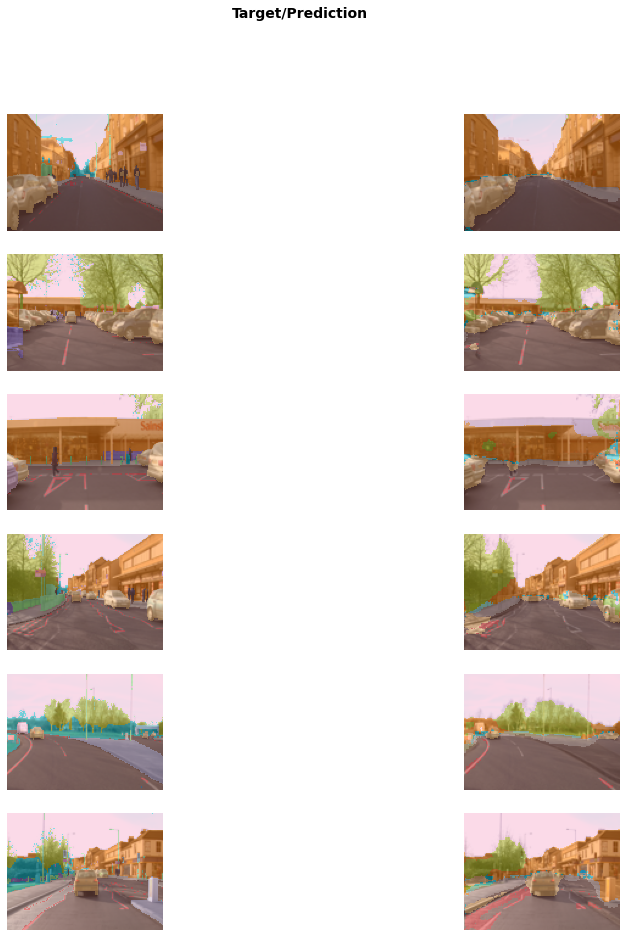

In [5]:
learn.show_results(max_n=6, figsize=(15,15))